In [1]:
pip install torch torchvision transformers torch-geometric networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlin

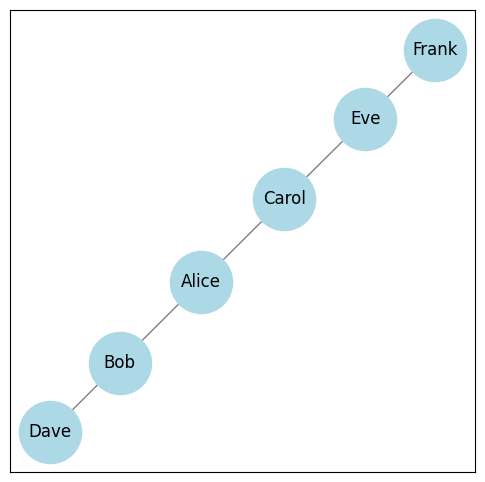

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple social network graph
G = nx.Graph()
G.add_edges_from([
    ('Alice', 'Bob'),
    ('Alice', 'Carol'),
    ('Bob', 'Dave'),
    ('Carol', 'Eve'),
    ('Eve', 'Frank'),
])

# Visualize the graph
plt.figure(figsize=(6, 6))
nx.draw_networkx(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000)
plt.show()

In [3]:
from torch_geometric.utils import from_networkx
import torch

# Convert NetworkX graph to PyTorch Geometric format
data = from_networkx(G)
data.x = torch.eye(data.num_nodes)  # Assign identity matrix as initial node features

In [4]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

In [5]:
input_dim = data.x.shape[1]  # Same as the number of nodes
hidden_dim = 16
output_dim = 8

model = GNN(input_dim, hidden_dim, output_dim)

In [6]:
# Generate node embeddings
with torch.no_grad():
    node_embeddings = model(data)

In [ ]:
from huggingface_hub import login
login(token="your token")

In [10]:
from transformers import pipeline

# Load GPT model
generator = pipeline("text-generation", model="gpt2")

# Define a simple template for text generation
node_descriptions = []
for node, neighbors in G.adjacency():
    description = f"{node} is connected to {', '.join(neighbors)}."
    node_descriptions.append(description)

# Generate richer summaries using GPT
for description in node_descriptions:
    result = generator(description, max_length=50, num_return_sequences=1)
    print(result[0]['generated_text'])

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Alice is connected to Bob, Carol.

Catherine was present when John's father finally met her (she called this an "extended conversation") but then they never met again and neither was Carol.

They became friends after Carol met


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Bob is connected to Alice, Dave. "Let's go go check out their house," says Alice.

Alice goes and visits their home, which is owned by David. "We're gonna go out and see how they're doing," says


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Carol is connected to Alice, Eve. It is not as close to the brain as they believe it to be and it probably has a low energy level. Therefore Alice might take advantage of any momentary shift in Alice's behaviour. The only way


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dave is connected to Bob. And Bob keeps telling him to go home if he can't go home, he's got to go and he doesn't want you all to call him back. Or he says "Well, he's just telling us why


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Eve is connected to Carol, Frank. Carol says that she needs to be done with this job. Carol says, I'm done, and Frank gives a happy chuckle. Carol says, but you can't force her to do this. Carol says
Frank is connected to Eve. To see how, we turn to a story arc from The Lion King, in which one character, Ethel, fights alongside her mother of four siblings. He takes her to the village of The Forest, but she's


In [12]:
# Convert GNN embeddings into textual features
embedding_texts = [
    f"Node {i} has an embedding: {embedding.tolist()}" for i, embedding in enumerate(node_embeddings)
]

# Combine embeddings with graph structure for GPT
for i, description in enumerate(node_descriptions):
    gnn_info = embedding_texts[i]
    combined_input = description + " " + gnn_info
    result = generator(combined_input, max_new_tokens=50, num_return_sequences=1)
    print(result[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Alice is connected to Bob, Carol. Node 0 has an embedding: [-0.09297060966491699, 0.11904522776603699, -0.050184216350317, 0.09978514909744263, -0.041631441563367844, -0.12464093416929245, 0.03925103694200516, -0.025511642917990685] node[0, -1].text = "No, please do not read this file! Be careful when reading this!" script.start() node[0, -1].text = (script.size() for script in [script.read


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Bob is connected to Alice, Dave. Node 1 has an embedding: [-0.14188902080059052, 0.17663782835006714, -0.05200202018022537, 0.1657591015100479, -0.10242027789354324, -0.08927219361066818, 0.043693747371435165, -0.03157348558306694] #[DEBUG] Adding node 0 to the cache. #[DISMATCH] Link the given node to it using a flag: node_id[0]=0, node_secret[1]=0, node_location[2]=[


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Carol is connected to Alice, Eve. Node 2 has an embedding: [-0.1073138490319252, 0.20019608736038208, -0.04614395648241043, 0.15421703457832336, -0.06479319930076599, -0.04202987253665924, 0.03490685671567917, -0.09686700999736786] [01:59:02.621] [Server thread/DEBUG] [FML/]: Bar Step: Construction - Mortar - using the appropriate node [01:59:02.719] [Server thread/DEBUG] [FML


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dave is connected to Bob. Node 3 has an embedding: [-0.1409691870212555, 0.16629615426063538, -0.06376411020755768, 0.17462247610092163, -0.11534459888935089, -0.042322129011154175, 0.048142336308956146, -0.0328313484787941] node2[255]: Received block reward: -0.0949152568671424, 0.895654437851747, 0.3550275875491560, 0.1835284450


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Eve is connected to Carol, Frank. Node 4 has an embedding: [-0.12831303477287292, 0.279580682516098, -0.03532646968960762, 0.2502900958061218, -0.1347043663263321, 0.044771499931812286, 0.0718078762292862, -0.16108527779579163] -0.372255792722304416, -0.041638166058233655, 2.2637773965794423, 1] 0.03722557927223044
Frank is connected to Eve. Node 5 has an embedding: [-0.11708477884531021, 0.28716468811035156, 0.0035076672211289406, 0.2601275146007538, -0.15021651983261108, 0.08159061521291733, 0.06997387111186981, -0.15664947032928467] -0.155525795728233576, -0.082280395949394621} [-13.181222, 1038.23641157, 0.078079809749


In [13]:
# Save summaries to a file
with open("graph_summaries.txt", "w") as f:
    for i, description in enumerate(node_descriptions):
        f.write(f"{description}\n")

print("Summaries saved to 'graph_summaries.txt'")

Summaries saved to 'graph_summaries.txt'
